In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'ccdata:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F14701%2F19663%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240508%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240508T204123Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9162563dfef9ff8793fa84c1dad457dccd0bc86b0900c939f94639b71aa2dabcd96d452a818a67ed135fa4529322a6161503acc5d6ce4b1be332efc7788c885b651c3f72a5308312b6aa459037a4131150dc9105cb4eebb7e6b60f8afba86042dae5386a36b95e88b39aa7ab8f583904f4e7a3389e8c1dc31c6b4f23afafd9ac69df7283000656ccbde52e66bc8133127c2de60b9cee34afe1e59c534b62f31bd116ada787160bbe446d1ff751bcb965c83db95a1080da83ccc57037946798f34335c52a4c5e0bbb94beeda38acc6ddc5c9dfebf931a6efbd46104f6b1b424b175b11329cb0cc48fa39b748c8e4b849b921d9ee9d809a780575a18abeb84a8e9'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 348486 bytes downloaded
Downloaded and uncompressed: ccdata
Data source import complete.


<p style="background-color:#F03A17; font-family:Cambria; color:white; font-size:250%; text-align:center; border-radius:50px 50px;"><b>Customer Segmentation | Credit Card Clustering</b></p>

<center>
<img src="https://www.cleartouch.in/wp-content/uploads/2023/02/Customer-Segmentation.png" width="1400">
</center>

<div style="border-radius:30px; padding:15px; font-family:Cambria; background-color:#FCECAE; font-size:140%; text-align:left">

<h3 align="left"><font color=#F03A17 font-family:Cambria;><b>About the dataset:</b></font></h3>

The problem described in this dataset requires us to <b>extract segments of customers depending on their behaviour patterns</b> provided in the dataset, to focus marketing strategy of the company on a particular segment. The dataset for this notebook consists of the <b>usage behavior of around 9000 credit card users</b> for the last six months <b>with 18 behavioral features</b>.


<hr>

<a id="description"></a>
# <p style="background-color:#F03A17; font-family:Cambria; color:white; font-size:150%; text-align:center; border-radius: 50px 15px; "><b>Dataset Description</b></p>

<div style="border-radius:30px; padding: 15px; background-color: #FCECAE; font-size:140%; text-align:left; font-family:Cambria">

    
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __CUST_ID__ | Identification of Credit Card holder (Categorical). |                
| __BALANCE__ | Balance amount left in their account to make purchases. |                        
| __BALANCE_FREQUENCY__ | How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated). |
| __PURCHASES__ | Amount of purchases made from account. |
| __ONEOFF_PURCHASES__ | Maximum purchase amount done in one-go. |                     
| __INSTALLMENTS_PURCHASES__ | Amount of purchase done in installment. |
| __CASH_ADVANCE__ | Cash in advance given by the user. |  
| __PURCHASES_FREQUENCY__ | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased). |                      
| __ONEOFF_PURCHASES_FREQUENCY__ | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased). |
| __PURCHASES_INSTALLMENTS_FREQUENCY__ |   How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done). |
| __CASH_ADVANCE_FREQUENCY__ |  How frequently the cash in advance being paid. |                      
| __CASH_ADVANCE_TRX__ | Number of Transactions made with "Cash in Advanced". |              
| __PURCHASES_TRX__ | Numbe of purchase transactions made. |                      
| __CREDIT_LIMIT__ | Limit of Credit Card for user. |
| __PAYMENTS__ | Amount of Payment done by user. |
| __MINIMUM_PAYMENTS__ | Minimum amount of payments made by user. |
| __PRC_FULL_PAYMENT__ | Percent of full payment paid by user. |
| __TENURE__ | Tenure of credit card service for user. |

<hr>

<a id="obj"></a>
# <p style="background-color:#F03A17; font-family:Cambria; color:white; font-size:150%; text-align:center; border-radius: 50px 15px; "><b>Objectives</b></p>

<div style="border-radius:30px; padding: 15px; background-color: #FCECAE; font-size:110%; text-align:left; font-family:Cambria">
    
1. <b>Data Understanding</b>
2. <b>Exploratory Data Analysis (EDA)</b>
   - Univariate Analysis
   - Bivariate Analysis
   - Multivariate Analysis
3. <b>Data Preprocessing</b>
   - Irrelevant Features Removal
   - Missing Value Treatment
   - Outlier Treatment
   - Encoding Categorical Features
   - Time Feature Transformation
   - Feature Scaling
   - Transforming Skewed Features
4. <b>Customers Clustering Using Various Clustering Models</b>
   - K-Means
   - DBSCAN
   - Agglomerative
5. <b>Models Evaluation</b>
   - Silhouette Score
   - Davies-Bouldin Index
   - Calinski-Harabasz Index

<hr>

<a id="contents_tabel"></a>    
<div style="border-radius:30px; padding: 15px; background-color:#FCECAE; font-size:110%; text-align:left; font-family:Cambria">

<h3 align="left"><font color=#F03A17><b>Table of Contents:</b></font></h3>

* [Dataset Description](#description)
* [Objectives](#obj)    
* [Import Libraries](#import)
* [Read Dataset](#read)
* [First Look at the Dataset](#first)
* [EDA](#eda)
* [Data Preprocessing](#preprocessing)
    - [Missing Value Treatment](#missing)
    - [Feature Scaling](#scaling)
    - [Dimensionality Reduction](#)
* [Clustering Models](#models)
    - [K-Means](#K-Means)
    - [DBSCAN](#DBSCAN)
    - [Agglomerative](#Agglomerative)
* [Models Evaluation](#eval)
    - [Silhouette Score](#Silhouette)
    - [Davies-Bouldin Index](#Davies)
    - [Calinski-Harabasz Index](#Calinski)    

<hr>

<a id="import"></a>
# <p style="background-color:#F03A17; font-family:Cambria; color:white; font-size:150%; text-align:center; border-radius:50px 15px; "><b>Import Libraries</b></p>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import itertools
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.impute import KNNImputer
from yellowbrick.style import set_palette
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.neighbors import NearestNeighbors
from matplotlib.patches import Rectangle
import matplotlib.patches as patches
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score, jaccard_score
import warnings
warnings.filterwarnings(action="ignore")

<hr>

<a id="read"></a>
# <p style="background-color:#F03A17; font-family:Cambria; color:white; font-size:150%; text-align:center; border-radius:50px 15px;"><b>Read Dataset</b></p>

In [ ]:
data = pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv')
colors = ['#003f5c','#2f4b7c','#665191','#a05195','#d45087','#f95d6a','#ff7c43','#ffa600']
palette = ['#302c36', '#037d97', '#E4591E', '#C09741', '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']
cluster_colors = ['#FD3792', '#20CAFC', '#FF8C00', '#601880']
data.head().style.background_gradient(cmap='YlOrBr')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.400000,0.000000,95.400000,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.000000,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.000000,0.000000,0.000000,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.000000,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.170000,773.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.000000,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.000000,1499.000000,0.000000,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.000000,0.000000,nan,0.000000,12
4,C10005,817.714335,1.000000,16.000000,16.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.000000,678.334763,244.791237,0.000000,12


<hr>

<a id="first"></a>
# <p style="background-color:#F03A17; font-family:Cambria; color:white; font-size:150%; text-align:center; border-radius:50px 15px;"><b>First Look at the Dataset</b></p>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
data.describe().T.style.background_gradient(cmap='YlOrBr')

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.000000,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.138560
BALANCE_FREQUENCY,8950.000000,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.000000
PURCHASES,8950.000000,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.570000
ONEOFF_PURCHASES,8950.000000,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.250000
INSTALLMENTS_PURCHASES,8950.000000,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.000000
CASH_ADVANCE,8950.000000,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.211760
PURCHASES_FREQUENCY,8950.000000,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.000000,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.000000,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8950.000000,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.500000


In [ ]:
data.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
CUST_ID               0
BALANCE               0
PRC_FULL_PAYMENT      0
dtype: int64

In [ ]:
print('Number of duplicate rows in data = %d' % (data.drop(columns='CUST_ID').duplicated().sum()))

Number of duplicate rows in data = 0


<hr>

<a id="eda"></a>
# <p style="background-color:#F03A17; font-family:Cambria; color:white; font-size:150%; text-align:center; border-radius:50px 15px;"><b>EDA</b></p>

In [ ]:
fig = px.pie(data, names='TENURE', height=500, width=800, hole=0.50)
title_layout = {'text':"Tenure Distribution", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top', 'font':{'family':'Lato, sans-serif', 'color':'darkred', 'size':30}}
fig.update_traces(hovertemplate=None, textposition='outside', texttemplate="%{label}<br>%{value} - %{percent}", textfont_size=13, rotation=-60,
    marker_line_width=8, marker_line_color='#F6F5F5')
fig.update_layout(title=title_layout, margin=dict(t=60, b=20, l=0, r=0), showlegend=False, plot_bgcolor='#F6F5F5', paper_bgcolor='#F6F5F5',
                        font=dict(size=15, color='black'), hoverlabel=dict(font_size=14, font_family="Lato, sans-serif"))
fig.show()

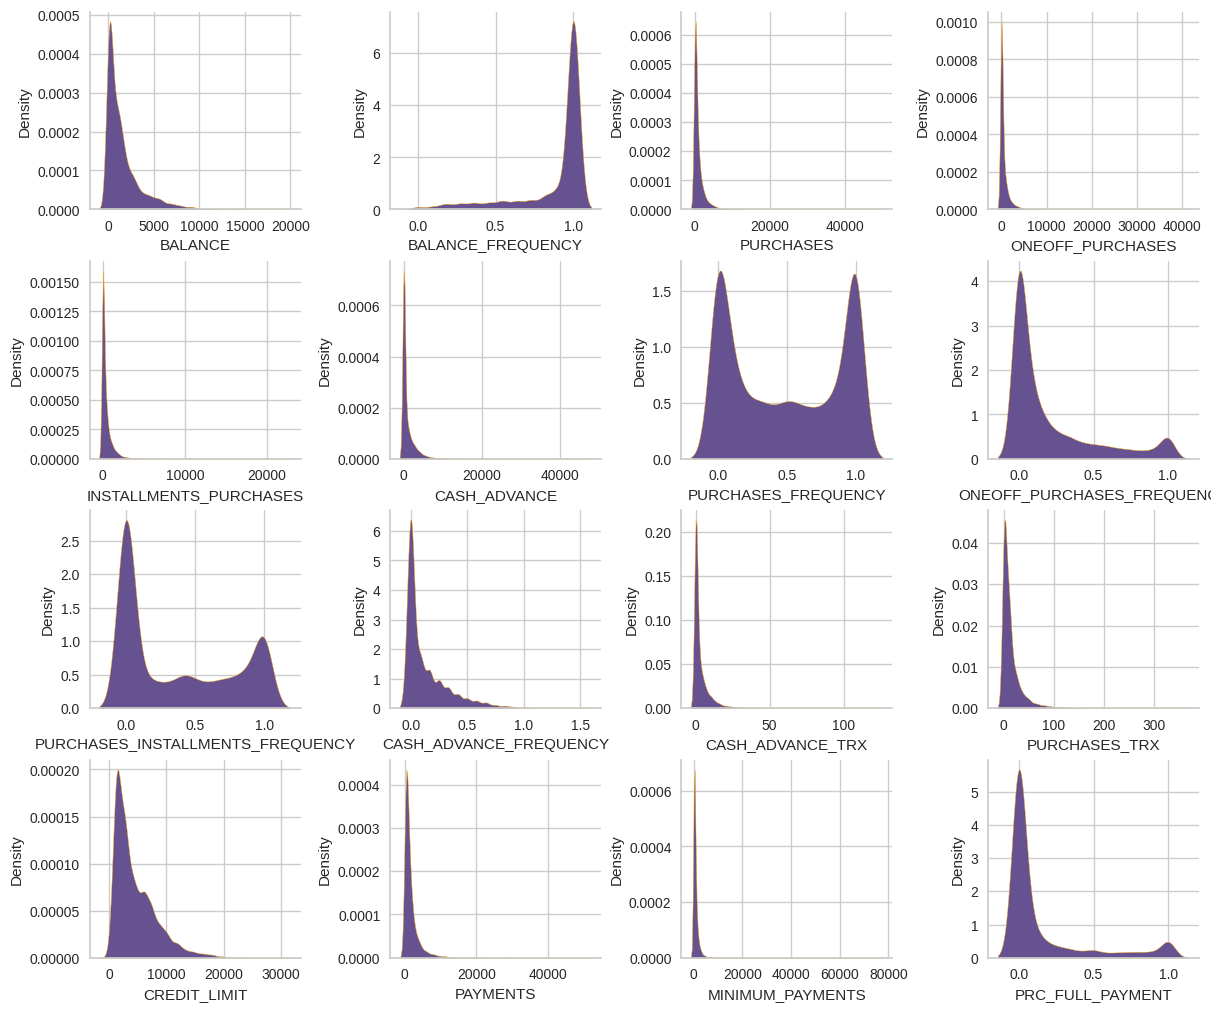

In [ ]:
fig = plt.figure(figsize=(12,10), constrained_layout=True)
j = 1
features = data.select_dtypes(exclude='object').columns.to_list()
features.remove('TENURE')
for feature in features:
  ax = plt.subplot(4, 4, j)
  ax = sns.kdeplot(data=data, x=feature, color=colors[2], fill=True, edgecolor=colors[-1], alpha=1)
  for s in ['right', 'top']:
      ax.spines[s].set_visible(False)
  j = j+1

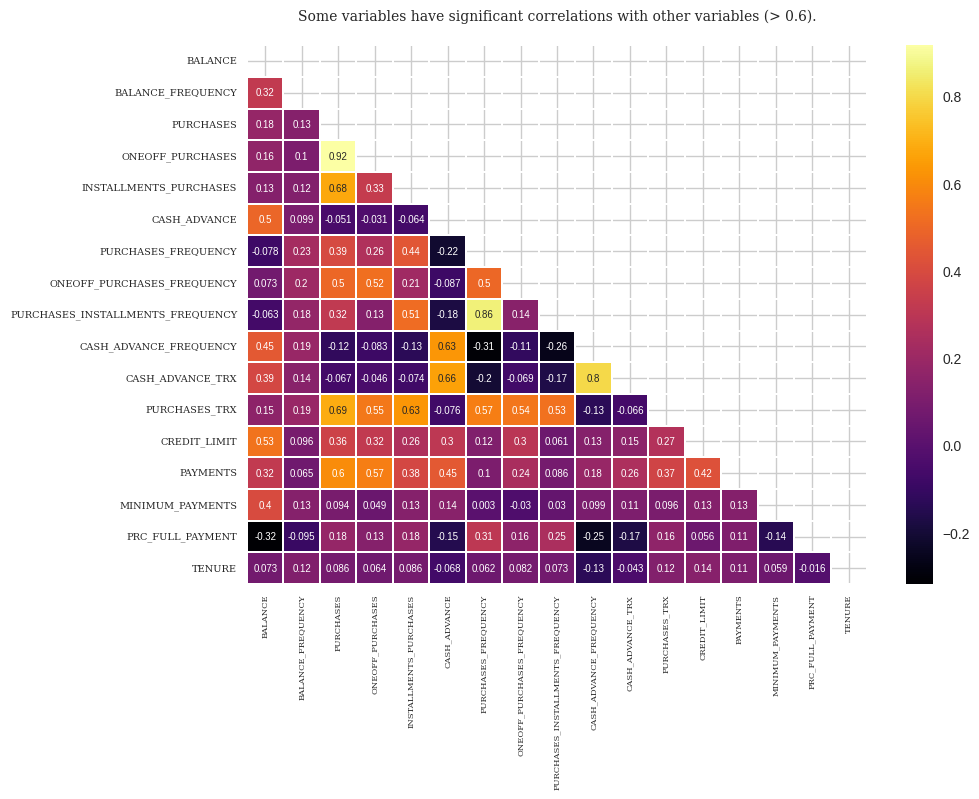

In [ ]:
mask = np.triu(np.ones_like(data.drop(columns='CUST_ID').corr(), dtype=bool))
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(data.drop(columns='CUST_ID').corr(), mask=mask, annot=True, cmap='inferno', linewidths=0.1, cbar=True, annot_kws={"size":7})
yticks, ylabels = plt.yticks()
xticks, xlabels = plt.xticks()
ax.set_xticklabels(xlabels, size=6, fontfamily='serif')
ax.set_yticklabels(ylabels, size=7, fontfamily='serif')
plt.title('Some variables have significant correlations with other variables (> 0.6).\n', fontsize=10, fontfamily='serif', loc='center')
plt.show();

<div style="border-radius:30px; padding:15px; font-family:Cambria; background-color:#FCECAE; font-size:140%; text-align:left">

<h3 align="left"><font color=#F03A17 font-family:Cambria;><b>Insights 👀</b></font></h3>

*   **CUST_ID** has unique values and should be removed.
*   There are missing values in CREDIT_LIMIT (1 missing value) and MINIMUM_PAYMENTS (313 missing values).
*   When using a credit card, most credit card customers prefer 12 months tenure compared to other tenure options.
*   Most columns are highly right-skewed, as seen from the density figur.
*   Seems like data have many outliers!
*   Some variables have moderate to high correlation values to other variables (>0.6 to 1). Examples of high correlation variables are PURCHASES and ONEOFF_PURCHASES, with a 0.92 correlation value.
*   Most of credit card accounts have 1 score in BALANCE_FREQUENCY column, which indicates that most customers use credit card frequently.


<hr>

<a id="preprocessing"></a>
# <p style="background-color:#F03A17; font-family:Cambria; color:white; font-size:150%; text-align:center; border-radius:50px 15px;"><b>Data Preprocessing</b></p>

In [ ]:
# drop the customer id column
data.drop(columns='CUST_ID', inplace=True)

In [ ]:
# imputing null values using KNNImputer()
null_columns = data.columns[data.isnull().any()].tolist()
imputer = KNNImputer()
data_imp = pd.DataFrame(imputer.fit_transform(data[null_columns]), columns=null_columns)
data = data.fillna(data_imp)
data.isnull().sum().sort_values(ascending=False)

BALANCE                             0
CASH_ADVANCE_FREQUENCY              0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
PURCHASES_INSTALLMENTS_FREQUENCY    0
BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
TENURE                              0
dtype: int64

In [ ]:
# Scaling Dataset using StandardScaler
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns.to_list())

In [ ]:
# Dimensionality reduction using PCA
pca = PCA(n_components=2, random_state=24)
red_data= pca.fit_transform(np.asarray(scaled_data))

In [ ]:
fig = go.Figure()
# Customize the layout
title_layout = {'text':"PCA Componants", 'y':0.90, 'x':0.5, 'xanchor':'center', 'yanchor':'top',
                'font':{'family':'Lato, sans-serif', 'color':'darkred', 'size':30}}
fig.update_layout(title=title_layout, xaxis_title='PC1', yaxis_title='PC2', width=800, height=600)

# Add the scatter trace
fig.add_trace(go.Scatter(x=red_data[:,0], y=red_data[:,1], mode='markers',
                         marker=dict(size=12, color='#cb1dd1', opacity=0.8, line=dict(width=1, color='black'))))
fig.show()

<hr>

<a id="models"></a>
# <p style="background-color:#F03A17; font-family:Cambria; color:white; font-size:150%; text-align:center; border-radius:50px 15px;"><b>Clustering Models</b></p>

### <b><span style='color:#F03A17'>K-means:</span></b>

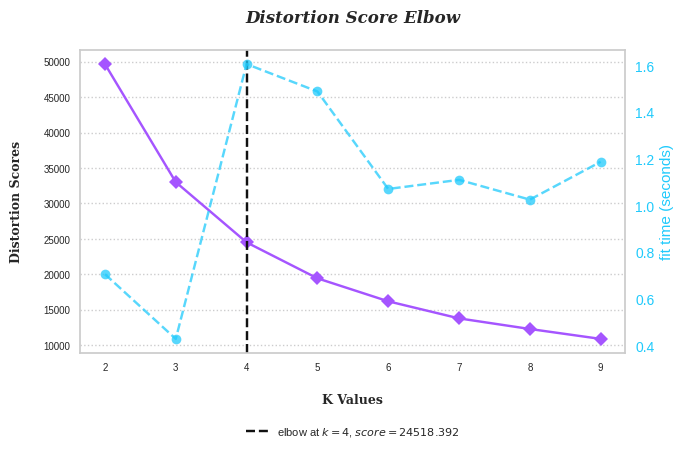

In [ ]:
# --- Figures Settings ---
color_palette=['#A555FF', '#20CAFC']
set_palette(color_palette)
title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
text_style=dict(fontweight='bold', fontfamily='serif')
fig, (ax1) = plt.subplots(1, 1, figsize=(7, 5))

# --- Elbow Score ---
elbow_score = KElbowVisualizer(KMeans(random_state=32, max_iter=500, n_init=10), k=(2, 10), ax=ax1)
elbow_score.fit(red_data)
elbow_score.finalize()
elbow_score.ax.set_title('Distortion Score Elbow\n', **title)
elbow_score.ax.tick_params(labelsize=7)
for text in elbow_score.ax.legend_.texts:
    text.set_fontsize(9)
for spine in elbow_score.ax.spines.values():
    spine.set_color('None')
elbow_score.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), borderpad=2, frameon=False, fontsize=8)
elbow_score.ax.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
elbow_score.ax.grid(axis='x', alpha=0)
elbow_score.ax.set_xlabel('\nK Values', fontsize=9, **text_style)
elbow_score.ax.set_ylabel('Distortion Scores\n', fontsize=9, **text_style)

plt.tight_layout()
plt.show()

<div style="border-radius:30px; padding:15px; font-family:Cambria; background-color:#FCECAE; font-size:140%; text-align:left">

💡 Based on the results of the elbow method above, it can be concluded that the best clustering number for the K-Means algorithm is 4 clusters.

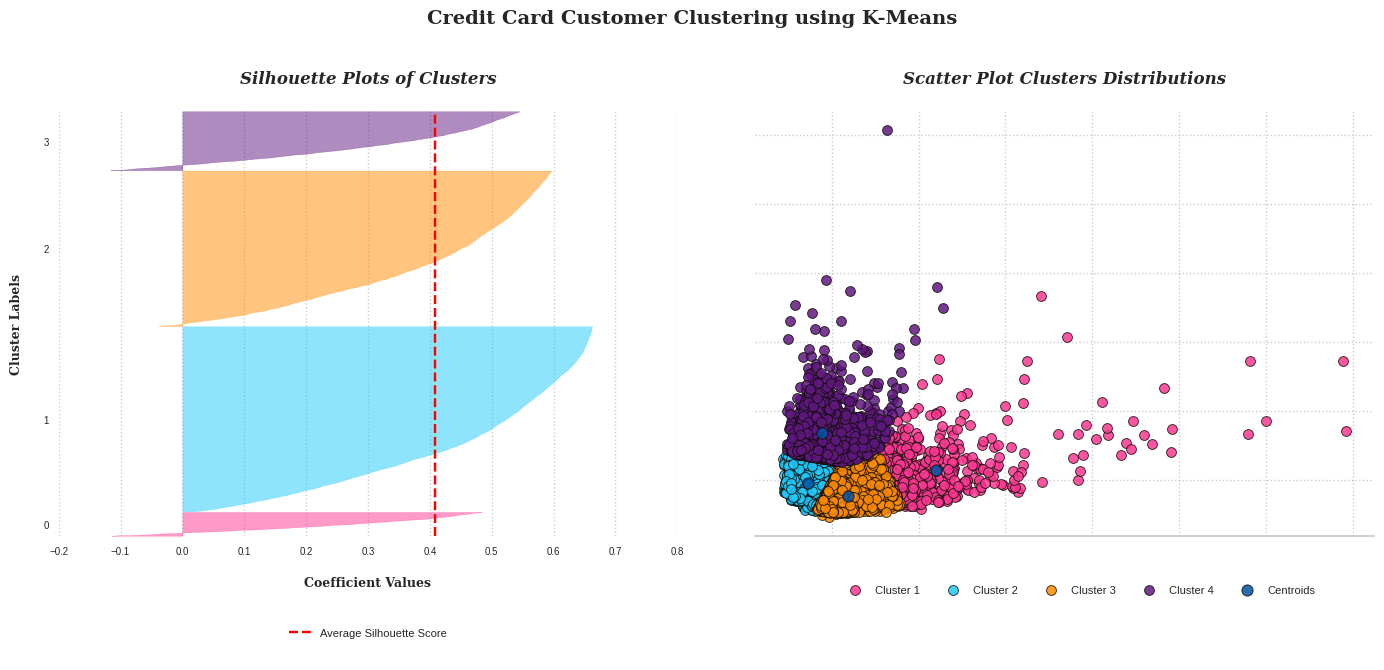

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=32, max_iter=500, n_init=10)
y_kmeans = kmeans.fit_predict(red_data)

# --- Figures Settings ---
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Centroids']
title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
text_style=dict(fontweight='bold', fontfamily='serif')
scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
legend_style=dict(borderpad=2, frameon=False, fontsize=8)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# --- Silhouette Plots ---
s_viz = SilhouetteVisualizer(kmeans, ax=ax1, colors=cluster_colors)
s_viz.fit(red_data)
s_viz.finalize()
s_viz.ax.set_title('Silhouette Plots of Clusters\n', **title)
s_viz.ax.tick_params(labelsize=7)
for text in s_viz.ax.legend_.texts:
    text.set_fontsize(9)
for spine in s_viz.ax.spines.values():
    spine.set_color('None')
s_viz.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), **legend_style)
s_viz.ax.grid(axis='x', alpha=0.5, color='#9B9A9C', linestyle='dotted')
s_viz.ax.grid(axis='y', alpha=0)
s_viz.ax.set_xlabel('\nCoefficient Values', fontsize=9, **text_style)
s_viz.ax.set_ylabel('Cluster Labels\n', fontsize=9, **text_style)

# --- Clusters Distribution ---
y_kmeans_labels = list(set(y_kmeans.tolist()))
for i in y_kmeans_labels:
    ax2.scatter(red_data[y_kmeans==i, 0], red_data[y_kmeans == i, 1], s=50, c=cluster_colors[i], **scatter_style)
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=65, c='#0353A4', label='Centroids', **scatter_style)
for spine in ax2.spines.values():
    spine.set_color('None')
ax2.set_title('Scatter Plot Clusters Distributions\n', **title)
ax2.legend(labels, bbox_to_anchor=(0.95, -0.05), ncol=5, **legend_style)
ax2.grid(axis='both', alpha=0.5, color='#9B9A9C', linestyle='dotted')
ax2.tick_params(left=False, right=False , labelleft=False , labelbottom=False, bottom=False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['bottom'].set_color('#CAC9CD')

plt.suptitle('Credit Card Customer Clustering using K-Means\n', fontsize=14, **text_style)
plt.tight_layout()
plt.show()

<div style="border-radius:30px; padding:15px; font-family:Cambria; background-color:#FCECAE; font-size:140%; text-align:left">

<h3 align="left"><font color=#F03A17 font-family:Cambria;><b>Insights 👀</b></font></h3>

*   The image above illustrates each cluster's silhouette coefficient values and
each cluster distribution in the scatter plot. From the silhouette clusters, the silhouette value of each cluster is above the average, indicating all clusters are optimal. In addition, from the fluctuations of the silhouette plot size, all the clusters have a similar wide of fluctuations. However, from the thickness, clusters 2 and 3 have a thicker consistency than other clusters.
*   Compared to other clusters, clusters 2 and 3 have a higher viscosity. This is because most data points are located at the bottom-left corner of the scatter plot, and the number of customers in both clusters is more than 35%.




<hr>

### <b><span style='color:#F03A17'>DBSCAN:</span></b>

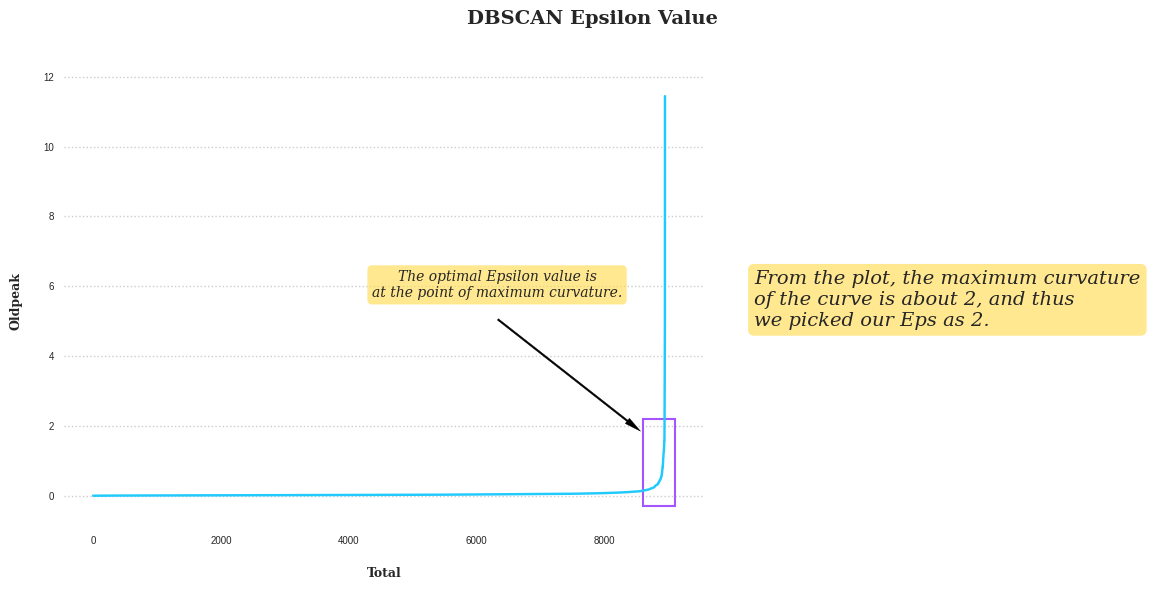

In [ ]:
# --- Calculate Nearest Neighbors ---
neighbors = NearestNeighbors(n_neighbors=2)
nbrs = neighbors.fit(red_data)
distances, indices = nbrs.kneighbors(red_data)
distances = np.sort(distances, axis = 0)

# --- Figure Settings ---
bbox=dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
txt1=dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
txt2=dict(textcoords='offset points', va='center', fontfamily='serif', style='italic')
kw=dict(arrowstyle='Simple, tail_width=0.1, head_width=0.4, head_length=1', color='black')
text_style=dict(fontweight='bold', fontfamily='serif')
fig=plt.figure(figsize=(12, 6))

# --- Epsilon Plot ---
distances_1=distances[:, 1]
ax1=fig.add_subplot(1, 3, (1, 2))
plt.plot(distances_1, color='#20CAFC')
plt.xlabel('\nTotal', fontsize=9, **text_style)
plt.ylabel('Oldpeak\n', fontsize=9, **text_style)
ax1.add_patch(Rectangle((8600, -0.3), 500, 2.5, edgecolor='#A555FF', fill=False, lw=1.5))
plt.annotate('The optimal Epsilon value is\nat the point of maximum curvature.', xy=(6300, 6), xytext=(1, 1), fontsize=10, bbox=bbox, **txt1)
plt.annotate('', xy=(8600, 1.8), xytext=(6300, 5.1), arrowprops=kw)
for spine in ax1.spines.values():
    spine.set_color('None')
plt.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
plt.grid(axis='x', alpha=0)
plt.tick_params(labelsize=7)

# --- Explanations ---
ax2=fig.add_subplot(1, 3, 3)
plt.annotate('From the plot, the maximum curvature\nof the curve is about 2, and thus\nwe picked our Eps as 2.', xy=(0.1, 0.5), xytext=(1, 1), fontsize=14, bbox=bbox, **txt2)
for spine in ax2.spines.values():
    spine.set_color('None')
plt.grid(axis='both', alpha=0)
plt.axis('off')

plt.suptitle('DBSCAN Epsilon Value\n', fontsize=14, **text_style)
plt.tight_layout()
plt.show()

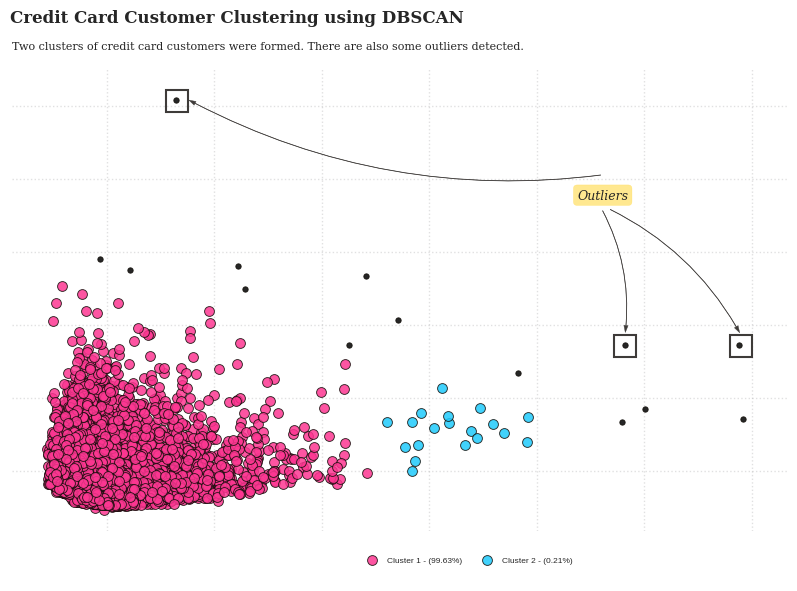

In [ ]:
# --- Implementing DBSCAN ---
dbscan = DBSCAN(eps=2, min_samples=4)
y_dbscan = dbscan.fit_predict(red_data)

# --- Figures Settings ---
cluster_colors=['#FD3792', '#20CAFC', 'black']
labels = ['Cluster 1', 'Cluster 2', 'Outliers']
suptitle=dict(fontsize=12, fontweight='heavy', fontfamily='serif')
title=dict(fontsize=8, fontfamily='serif')
scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
bbox=dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
txt=dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
legend_style=dict(borderpad=2, frameon=False, fontsize=6)

# --- Arrow Settings ---
style = 'Simple, tail_width=0.3, head_width=3, head_length=5'
kw = dict(arrowstyle=style, color='#3E3B39')
arrow1 = patches.FancyArrowPatch((23, 18), (24.1, 9.3), connectionstyle='arc3, rad=-0.16', **kw)
arrow2 = patches.FancyArrowPatch((23.3, 18), (29.5, 9.3), connectionstyle='arc3, rad=-0.16', **kw)
arrow3 = patches.FancyArrowPatch((23.1, 20.3), (3.7, 25.5), connectionstyle='arc3, rad=-0.16', **kw)

# --- Percentage labels ---
unique, counts = np.unique(y_dbscan, return_counts=True)
dbscan_count = dict(zip(unique, counts))
total = sum(dbscan_count.values())
dbscan_label = {key: round(value/total*100, 2) for key, value in dbscan_count.items() if key != -1}

# --- Clusters Distribution ---
y_dbscan_labels = list(set(y_dbscan.tolist()))
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for i in np.arange(0, 2, 1):
    plt.scatter(red_data[y_dbscan==i, 0], red_data[y_dbscan == i, 1], s=50, c=cluster_colors[i], label=labels[i], **scatter_style)
plt.scatter(red_data[y_dbscan==-1, 0], red_data[y_dbscan == -1, 1], s=15, c=cluster_colors[2], label=labels[2], **scatter_style)
for spine in ax.spines.values():
    spine.set_color('None')
plt.legend([f"Cluster {i+1} - ({k}%)" for i, k in dbscan_label.items()], bbox_to_anchor=(0.75, -0.01), ncol=3, **legend_style)
plt.grid(axis='both', alpha=0.3, color='#9B9A9C', linestyle='dotted')
ax.add_patch(Rectangle((29, 7.8), 1, 1.5, edgecolor='#3E3B39', fill=False, lw=1.5))
ax.add_patch(Rectangle((23.6, 7.8), 1, 1.5, edgecolor='#3E3B39', fill=False, lw=1.5))
ax.add_patch(Rectangle((2.75, 24.6), 1, 1.5, edgecolor='#3E3B39', fill=False, lw=1.5))
ax.add_patch(arrow1)
ax.add_patch(arrow2)
ax.add_patch(arrow3)
plt.annotate('Outliers', xy=(23, 18.8), xytext=(1, 1), fontsize=9, bbox=bbox, **txt)
plt.tick_params(left=False, right=False , labelleft=False , labelbottom=False, bottom=False)
plt.title('Two clusters of credit card customers were formed. There are also some outliers detected.\n', loc='left', **title)
plt.suptitle('Credit Card Customer Clustering using DBSCAN', x=0.123, y=0.98, ha='left', **suptitle)
plt.show()

<div style="border-radius:30px; padding:15px; font-family:Cambria; background-color:#FCECAE; font-size:140%; text-align:left">

<h3 align="left"><font color=#F03A17 font-family:Cambria;><b>Insights 👀</b></font></h3>

*   From DBSCAN implementation, there are 2 clusters formed. Cluster 1 has the most data points compared to cluster 2. However, there are some outliers detected since some points are too far from the other data points (DBSCAN considered it as an outlier and assigned -1 label to those points).

<hr>

### <b><span style='color:#F03A17'>Agglomerative:</span></b>

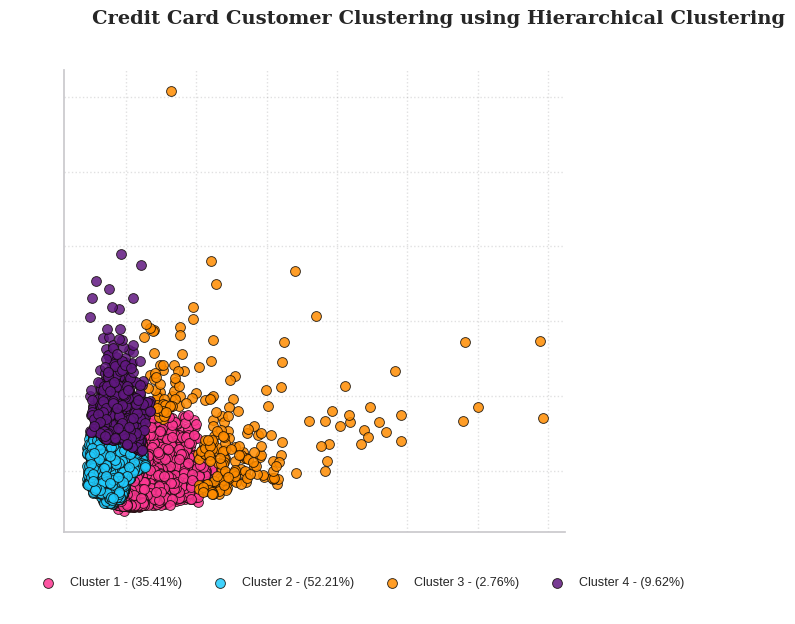

In [ ]:
agg_cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_agg_cluster = agg_cluster.fit_predict(red_data)

# --- Figures Settings ---
cluster_colors = ['#FD3792', '#20CAFC', '#FF8C00', '#601880']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
suptitle=dict(fontsize=14, fontweight='heavy', fontfamily='serif')
title=dict(fontsize=10, fontweight='bold', style='italic', fontfamily='serif')
scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
legend_style=dict(borderpad=2, frameon=False, fontsize=9)
fig=plt.figure(figsize=(10, 6))

# --- Percentage Labels ---
unique, counts = np.unique(y_agg_cluster, return_counts=True)
df_waffle = dict(zip(unique, counts))
total = sum(df_waffle.values())
wfl_square = {key: value/100 for key, value in df_waffle.items()}
wfl_label = {key: round(value/total*100, 2) for key, value in df_waffle.items()}

# --- Clusters Distribution ---
y_agg_labels = list(set(y_agg_cluster.tolist()))
ax1=fig.add_subplot(1, 3, (1, 2))
for i in y_agg_labels:
    ax1.scatter(red_data[y_agg_cluster==i, 0], red_data[y_agg_cluster == i, 1], s=50, c=cluster_colors[i], label=labels[i], **scatter_style)
for spine in ax1.spines.values():
    spine.set_color('None')
for spine in ['bottom', 'left']:
    ax1.spines[spine].set_visible(True)
    ax1.spines[spine].set_color('#CAC9CD')
ax1.legend([f"Cluster {i+1} - ({k}%)" for i, k in wfl_label.items()], bbox_to_anchor=(1.3, -0.03), ncol=4, **legend_style)
ax1.grid(axis='both', alpha=0.3, color='#9B9A9C', linestyle='dotted')
ax1.tick_params(left=False, right=False , labelleft=False , labelbottom=False, bottom=False)
plt.suptitle('Credit Card Customer Clustering using Hierarchical Clustering\n', **suptitle)
plt.show()

<div style="border-radius:30px; padding:15px; font-family:Cambria; background-color:#FCECAE; font-size:140%; text-align:left">

<h3 align="left"><font color=#F03A17 font-family:Cambria;><b>Insights 👀</b></font></h3>

*   From hierarchical clustering implementation, it can be seen that there are 4 clusters formed. From the 4 clusters, cluster 2 has most data points, followed by cluster 1. However, when compared with the results of clustering by K-Means, the results of cluster 2 using hierarchical have a more significant percentage. In addition, the hierarchical clustering algorithm considers outliers to be part of cluster 3.

<hr>

<a id="eval"></a>
# <p style="background-color:#F03A17; font-family:Cambria; color:white; font-size:150%; text-align:center; border-radius:50px 15px;"><b>Models Evaluation</b></p>

In [ ]:
# --- Evaluate Clustering Quality ---

# silhouette score
ss_kmeans = round(silhouette_score(red_data, y_kmeans), 3)
ss_dbscan = round(silhouette_score(red_data, y_dbscan), 3)
ss_agg = round(silhouette_score(red_data, y_agg_cluster), 3)



,Model,Silhouette Score,Calinski Harabasz Score,Davies Bouldin Score
0,K-Means,0.408000,5823.676000,0.801000
1,DBSCAN,0.803000,685.303000,1.287000
2,Hierarchical Clustering,0.388000,4797.510000,0.863000


 Davies-Bouldin score:

The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

The minimum score is zero, with lower values indicating better clustering.

Calinski and Harabasz score:

 It is also known as the Variance Ratio Criterion. The score is defined as ratio of the sum of between-cluster dispersion and of within-clust

A higher value of CH indicates a better clustering, because it means that the data points are more spread out between clusters than they are within clusters.

<div style="border-radius:30px; padding:15px; font-family:Cambria; background-color:#FCECAE; font-size:140%; text-align:left">

<h3 align="left"><font color=#F03A17 font-family:Cambria;><b>Insights 👀</b></font></h3>

**The table above shows that:**
    
**Kmeans:** has the second highest Silhouette score, the highest Calinski-Harabasz score and the lowest Davies-Bouldin score.

<hr>